In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

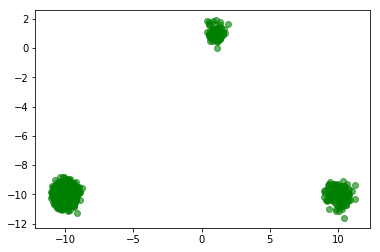

In [204]:
def build_toy_dataset(N, pi):
#   pi = np.array([0.1, 0.9])
  mus = [[1, 1], [-10, -10], [10, -10]]
  stds = [[0.1, 0.1], [0.1, 0.1], [0.2, 0.2]]
  x = np.zeros((N, 2), dtype=np.float32)
  for n in range(N):
    k = np.argmax(np.random.multinomial(1, pi))
    x[n, :] = np.random.multivariate_normal(mus[k], np.diag(stds[k]))
 
  return x
 
N = 5000  # number of data points
D = 2  # dimensionality of data

x_raw= build_toy_dataset(N, np.array([0.02, 0.95, 0.03]))

plt.scatter(x_raw[:, 0], x_raw[:, 1], color="green", alpha=0.6)
plt.show()

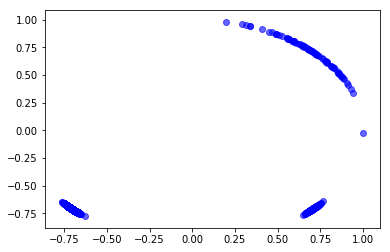

In [205]:
x = x_raw / np.sqrt(np.diag(np.dot(x_raw, x_raw.T))).reshape(-1, 1)  # 方向データ（長さ１のM次元ベクトル）へ変換
plt.scatter(x[:, 0], x[:, 1], color="blue", alpha=0.6)
plt.show()

In [206]:
m = (1/N) * np.sum(x, 0)
mu = m / np.sqrt(np.dot(m, m))

a = 1 - np.dot(x, mu)

In [207]:
a_mo1 = (1/N) * np.sum(a)
a_mo2 = (1/N) * np.sum(np.power(a, 2))

In [208]:
m_mo = (2 * np.power(a_mo1, 2)) / (a_mo2 - np.power(a_mo1, 2))  # 積率法で推定した自由度
s_mo = (a_mo2 - np.power(a_mo1, 2)) / (2 * a_mo1)  # 積率法で推定したスケール因子

In [209]:
import math
def chi_squared(x, k, s):  # k:自由度、s:スケール因子
    resp = (1 / (2 * s * math.gamma(k/2))) * np.power((x / (2*s)), (k/2)-1) * np.exp(-x / (2 * s))
    return resp

In [210]:
chi_sqr_dist = chi_squared(a, m_mo, s_mo)

/Users/masamitsuochiai/miniconda2/envs/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/masamitsuochiai/miniconda2/envs/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


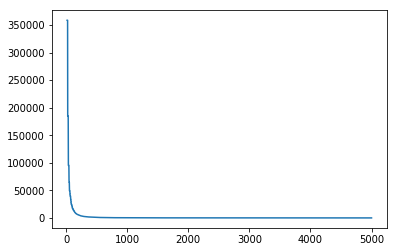

In [211]:
plt.plot(np.sort(chi_sqr_dist)[::-1])
plt.show()

In [212]:
chi2_val = stats.chi2.interval(alpha=0.95, df=m_mo, scale=s_mo)

/Users/masamitsuochiai/miniconda2/envs/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


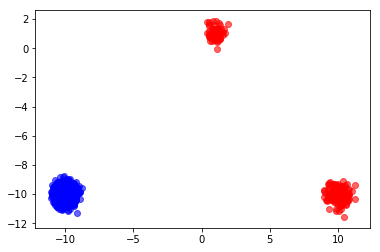

In [213]:
# thre = np.max(np.sort(chi_sqr_dist)[0:round(N*0.05)])
thre = chi2_val[1]

ind = chi_sqr_dist < thre
ind = ind.reshape(-1)

anomaly = x_raw[ind, :]
normal = x_raw[np.logical_not(ind), :]

plt.scatter(normal[:, 0], normal[:, 1], color="blue", alpha=0.6)
plt.scatter(anomaly[:, 0], anomaly[:, 1], color="red", alpha=0.6)

plt.show()